In [22]:
from ultralytics import YOLO

model = YOLO('yolov8x.pt')  # Load a pretrained YOLOv8 model
model.info()

YOLOv8x summary: 365 layers, 68,229,648 parameters, 0 gradients, 258.5 GFLOPs


(365, 68229648, 0, 258.5472512)


image 1/1 /Users/ke/Documents/Cal/research/physical-reasoning/demo/demo.jpg: 448x640 18 cars, 2 benchs, 256.7ms
Speed: 1.0ms preprocess, 256.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Predicted bench with confidence 0.962 at tensor([[222.0089, 175.3375, 456.1030, 382.1310]])
Predicted car with confidence 0.908 at tensor([[295.3603, 116.0550, 378.7220, 150.4118]])
Predicted car with confidence 0.903 at tensor([[191.2909, 108.9104, 299.1893, 155.4361]])
Predicted car with confidence 0.891 at tensor([[431.4721, 104.8091, 484.0837, 131.8983]])
Predicted car with confidence 0.868 at tensor([[481.3361, 110.3898, 522.8889, 130.2433]])
Predicted car with confidence 0.844 at tensor([[265.9401, 105.3029, 326.0040, 127.6179]])
Predicted car with confidence 0.820 at tensor([[167.4330, 109.0409, 212.1043, 139.9360]])
Predicted car with confidence 0.808 at tensor([[375.6009, 110.6982, 432.6725, 133.6223]])
Predicted car with confidence 0.805 at tensor([[554.6240, 109.9193,

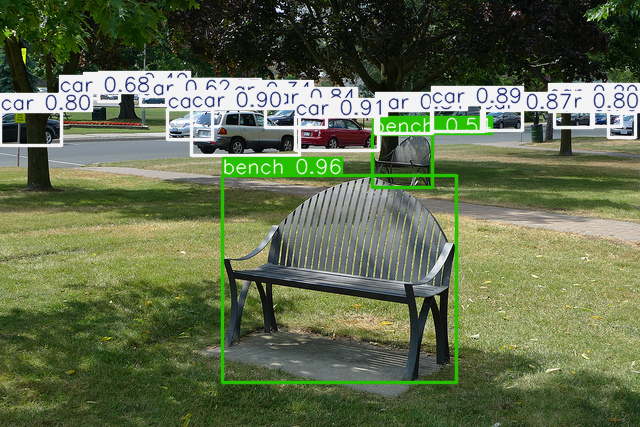

In [43]:
image_path = '/Users/ke/Documents/Cal/research/physical-reasoning/demo/demo.jpg'
results = model(image_path)

for result in results:
    boxes = result.boxes
    names = result.names
    
    for box in boxes:
        name = int(box.cls)
        confidence = float(box.conf)
        coord = box.xyxy # tensor of (x1, y1, x2, y2)
        print(f"Predicted {names[name]} with confidence {confidence:.3f} at {coord}")

tensor = results[0].plot()
# show the tensor as an image
from PIL import Image

# convert tensor from BGR to RGB
tensor = tensor[:, :, ::-1]

img = Image.fromarray(tensor, mode='RGB')
img